In [1]:
import importlib

import matplotlib.pyplot as plt
import numpy as np
import pipeline
from importlib import reload

reload(pipeline)

<module 'pipeline' from 'C:\\Users\\einkina\\Documents\\School\\Manifold Learning\\manifold-learning\\pipeline.py'>

In [2]:
reload(pipeline)
control_vars = pipeline.get_control_vars(pipeline.get_p())
response_matrix = pipeline.generate_array_of_swiss_rolls(control_vars)
standardized_x, centered_y, edges, y_means, y_scaler, x_means, x_stds = pipeline.prepare_data(control_vars, response_matrix)

In [3]:
reload(pipeline)
q = pipeline.solve_semidefinite_programming(standardized_x, centered_y, edges)

C:\Users\einkina\AppData\Local\Programs\Python\Python39\lib\site-packages\cvxpy\problems\problem.py:1403: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


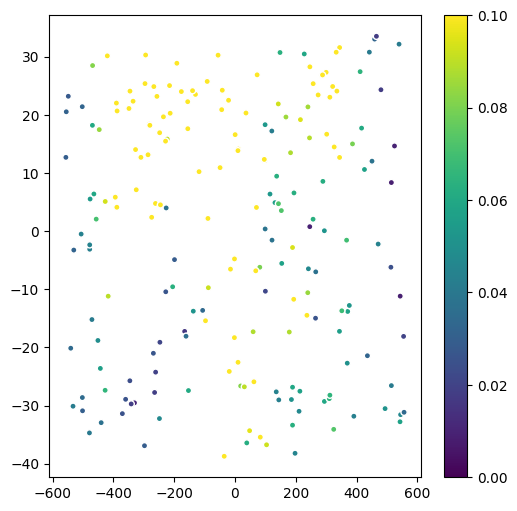

0.06978350710604661


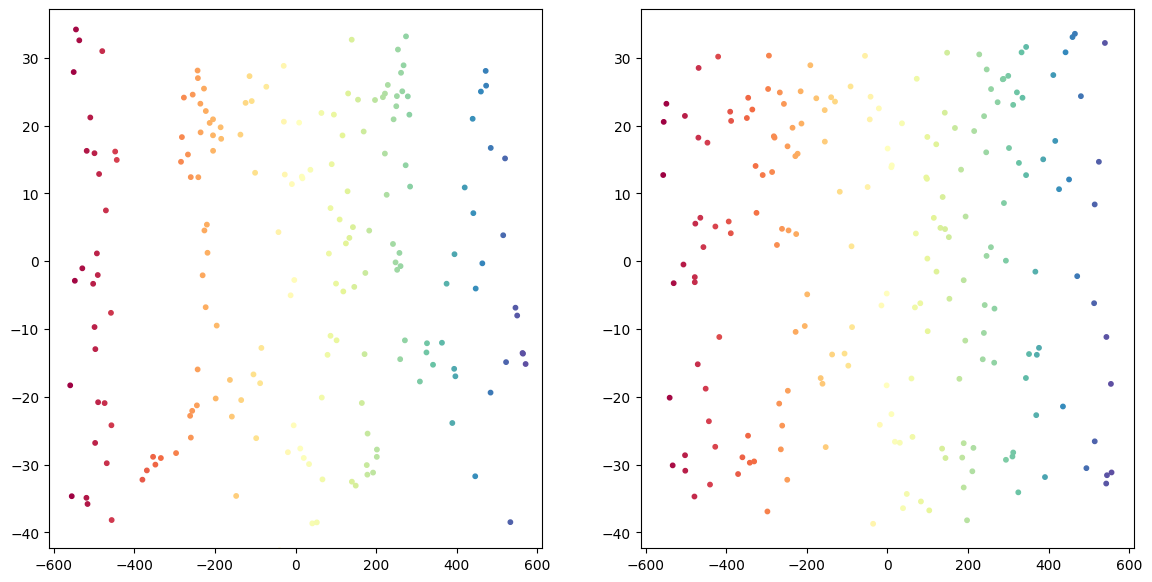

In [4]:
reload(pipeline)
ld_embedding = pipeline.reduce_dimensions(q)
regression_matrix = pipeline.regress(ld_embedding, standardized_x)
reconstructed_y = np.dot(standardized_x, regression_matrix)

rre = pipeline.compute_rre(ld_embedding, reconstructed_y)
pipeline.plot_rre_heatmap(rre, reconstructed_y)
print(np.median(rre))
pipeline.plot_two_embeddings(ld_embedding, reconstructed_y)

In [23]:
reload(pipeline)
test_control_vars = pipeline.get_control_vars(pipeline.get_p())
test_rolls = pipeline.generate_array_of_swiss_rolls(test_control_vars)
x_opts = []
for (roll, control_var) in zip(test_rolls, test_control_vars):
    x_opt, x_err = pipeline.predictive_optimization(roll, centered_y, ld_embedding, regression_matrix, y_means, y_scaler)
    x_opt = x_opt * x_stds + x_means
    x_opts.append(x_opt)
    print("-----------")
    print(f"x_opt  = {x_opt}, x_err = {x_err}")
    print(f"x_real = {control_var}")

x_ops = np.array(x_opts)
test_control_vars = np.array(test_control_vars)

-----------
x_opt  = [1.58786072 6.06826836], x_err = 6.273179938873112e-13
x_real = [5.054810630846451, 5.479113482746162]
-----------
x_opt  = [-0.61660477 -0.13758017], x_err = 1.147692591921544e-12
x_real = [8.834489633827395, 0.36589217371997385]
-----------
x_opt  = [-0.06314635  0.29190567], x_err = 2.354277080081792e-12
x_real = [8.68941924075508, 1.0537223548036656]
-----------
x_opt  = [4.71911917 3.14357747], x_err = 1.08089264160974e-11
x_real = [3.2690111004978037, 3.6609147112575413]
-----------
x_opt  = [1.87920144 3.48466713], x_err = 5.736708286152264e-12
x_real = [8.438701513503695, 4.474116003698313]
-----------
x_opt  = [3.93321527 3.06388643], x_err = 7.875829939067669e-12
x_real = [0.3840540837621509, 2.2165525578229497]
-----------
x_opt  = [2.3514435  6.15167044], x_err = 3.8149771872943555e-12
x_real = [6.63675841105311, 5.438295464915194]
-----------
x_opt  = [4.45566261 1.17270013], x_err = 4.7325017969636745e-12
x_real = [7.161569314544266, 1.940880535438884

[ 3.51665255  9.46449522  8.78565701  1.53962698  6.63370562  3.64890666
  4.34428679  2.81283349  4.15911151  1.83442383  2.20195985  8.10460255
  5.85784628  8.29284157  5.90778837  0.40693098  3.85583872  2.5564784
  3.92857431  6.65353749  1.53345591  1.24554257  3.76446432  1.97380152
  2.1022202   5.70723621  8.03085137  3.15758461  3.42519703 10.12951209
  0.64585091  3.90582925  8.27056522  2.53816365  1.28712438  5.91458541
  2.5132738   3.66394179  4.78904261  3.42400576  1.1894679   4.56156353
  1.60153976  2.58607159  5.71445061  2.73401826  1.69000903  2.75190406
  2.10527552  6.14048944  2.24478782  1.22225118  5.47802489  9.03867624
  1.68998678  6.89472176  4.65573532  5.50351725  4.64603055  1.96292309
  1.99296221  1.41021105  5.95489481  2.53842222  2.16953403  6.28743735
  7.48824292  6.92224557  0.67883608  3.90020186  3.10318877  1.77284552
  4.74488165  9.06193918  1.43478738  0.81584504  2.07151503  1.07046901
  2.41420459  4.0982633   0.61789813  1.20155997  7.

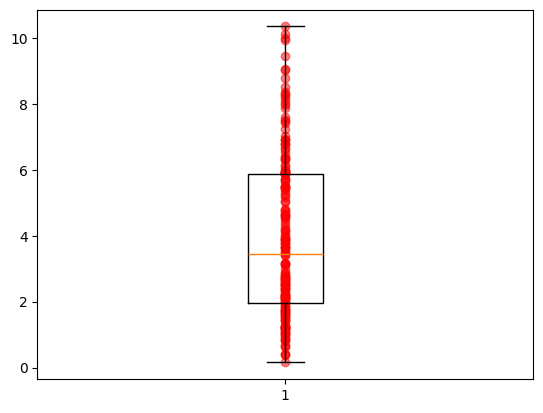

In [24]:
import matplotlib.pyplot as plt
errors = np.linalg.norm(x_opts - test_control_vars, axis = 1)
plt.boxplot(errors)
plt.scatter(np.ones_like(errors), errors, alpha=0.5, color='red')
print(errors)
print(f"Median of errors = {np.median(errors)}")